# Building a YOLOv3 Object Detector with Darknet in the Google Colab
This notebook will construct YOLOv3/v4 easily in the cloud with GPU enabled so that one can run real-time object detections as well as train custom object detectors.

# Step 1: Enabling GPU within your notebook
Enable GPU acceleration within the Colab notebook so that YOLO system will be able to process detections 100 times faster than CPU.

### Steps:

### i) Click **Edit** at top left of the notebook
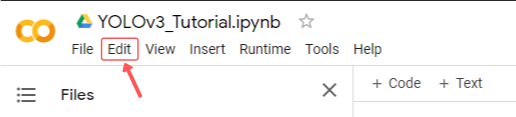
### ii) Click **Notebook Settings** within dropdown
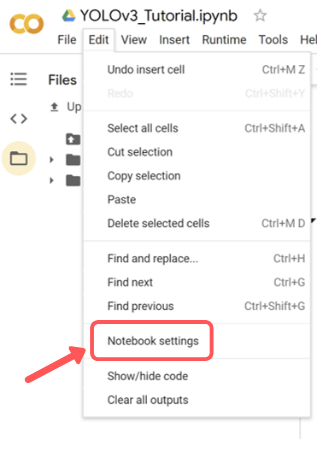
### iii) Under 'Hardware Accelerator' select **GPU** and then hit **Save**
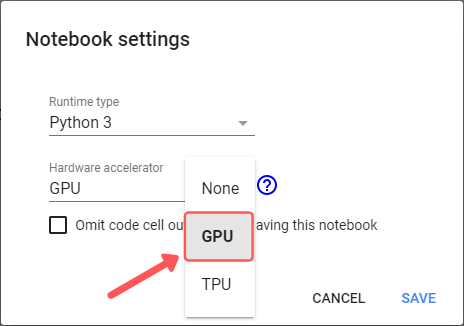

Your notebook should now have GPU enabled!

# Step 2: Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

Note that there might be some warnings when running the '!make' cell. Don't worry about them.

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.27 MiB | 22.20 MiB/s, done.
Resolving deltas: 100% (9995/9995), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# Step 3: Download pretrained YOLOv3/v4 weights
YOLOv3/v4 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3/v4 on these pretrained classes and get detections.

Download YOLOv3 weights:

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-02-14 18:34:47--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  40.4MB/s    in 6.3s    

2021-02-14 18:34:54 (37.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



Download YOLOv4 weights:

In [ ]:
# get yolov4 pretrained coco dataset weights
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Step 4: Run Detections with Darknet and YOLOv3/v4!
Darknet is now built and ready to run detections using YOLOv3/v4 in the cloud! You can find out which sorts of classes the pretrained YOLOv3/v4 weights can detect by clicking here. [COCO CLASSES](http://cocodataset.org/#explore)

The object detector can be run using the following command
```bash
!./darknet detect <path to config> <path to weights> <path to image>
```
Darknet comes with a few images already installed in the darknet/data/ folder.

**Note:** After running detections OpenCV can't open the image instantly in the cloud so we must run: 
```bash
imShow('predictions.jpg')
```
This will output the image with the detections shown. The most recent detections are always saved to 'predictions.jpg'

Try out the examples below for yourself!

In [ ]:
# run darknet detection on YOLOv3
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 10010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

In [ ]:
# run darknet detection on YOLOv4
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

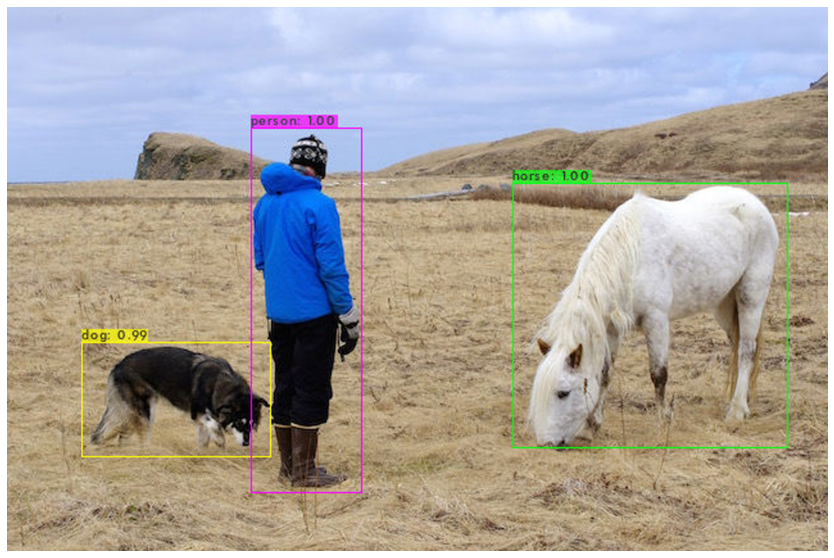

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

 CUDA-version: 10010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

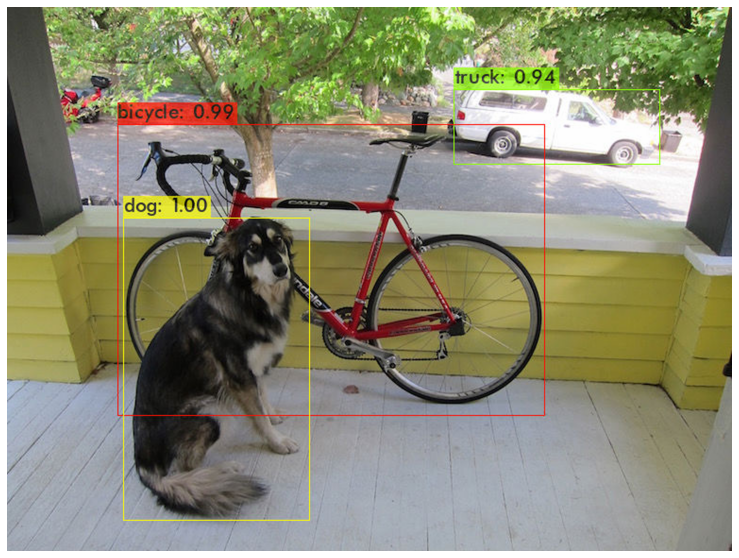

In [ ]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

 WOW this is magic! Make sure to click this link to be blessed with lots of YOLOv3 luck!!!
 [https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q?sub_confirmation=1](https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q?sub_confirmation=1)

In [ ]:

# This stops 'Run all' at this cell by causing an error
assert False

AssertionError: ignored

# Step 5: Uploading Local or Google Drive Files to Use
You may want to run detections on more than just the images within the darknet/data/ folder. This step will show you how to upload local or Google Drive files to the cloud VM and run detections on them!

### Method 1: Local Files
To upload local files just use our helper function by running 'upload()' as seen below. Click **Choose Files** and select the image from your local machine that you want to upload to the cloud VM.

If this function doesn't work for you then click the **Upload** button in the File Explorer on the left side of your notebook.
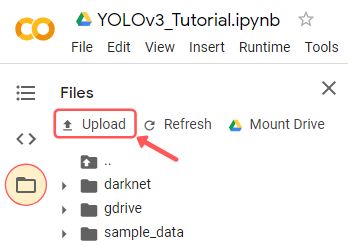


The image should save to your root directory so that you can access it from your darknet command by running.
```
!./darknet detect cfg/yolov3.cfg yolov3.weights ../<your image name>
```

In [ ]:
# upload an image to root directory (I uploaded an image called street.jpg, you can upload anything)
%cd ..
upload()

/content


Saving Ayane.jpg to Ayane.jpg
saved file Ayane.jpg


/content/darknet
 CUDA-version: 10010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, out

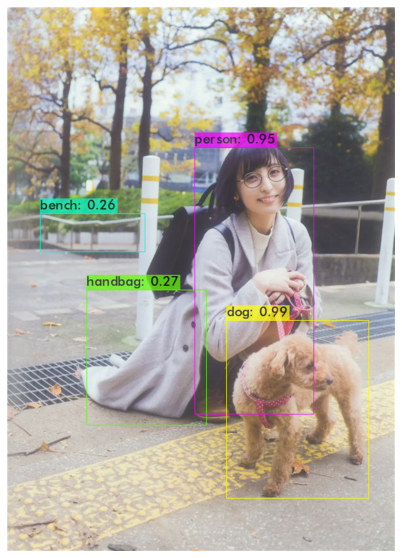

In [ ]:
# make sure in the darknet folder to run the detections command!
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights ../Ayane.jpg
imShow('predictions.jpg')

### Method 2: Google Drive
Images can also be uploaded from your Google Drive and easily have detections run on them.

You will want to run the below cell to mount your google drive into the cloud VM so that you can access its contents. It is that easy!

**NOTE:** Creating a symbolic link between '/content/gdrive/My\ Drive/' and '/mydrive.

This means we are just creating a shortcut '/mydrive' to map to the contents within the folder '/content/gdrive/My\ Drive/'.

The reason for this is that sometime having the space in 'My Drive' folder path can cause issues when running certain commands. This symbolic link will stop this from happening!

Now you can run YOLOv3/v4 with images from Google Drive using the darknet command:
```
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/<path to image>
```

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'   models		     yolov3_tiny_flower   画
 Computer_Vision   'My Drive'		     YOLOv4
 film		    Object_Detection_Files   YOLOv4-2
 image		    YOLOv3		     yolov4_tiny_flower


/content/darknet
 CUDA-version: 10010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, out

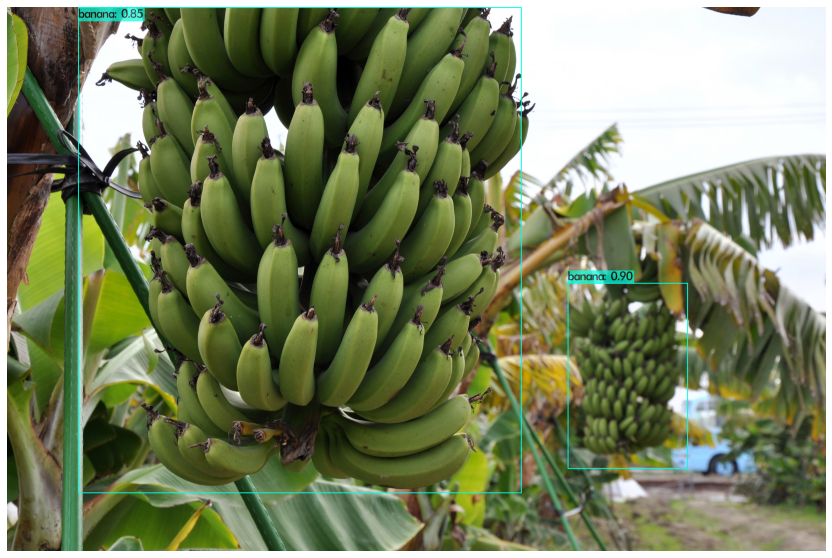

In [ ]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/image/banana.jpg
imShow('predictions.jpg')

### Download Files to Local Machine or Google Drive from Cloud VM
You can also easily download images from your cloud VM to save to your local machine or Google Drive. 

#### Method 1: Local Machine

You can do it easily by using our helper function 'download()' or by right clicking the image in the File Explorer on the left side of your notebook and hitting **Download**. Files will be saved to your *Downloads* folder.

This is useful if you want to download the **'predictions.jpg'** images that the object detector outputs. 

#### Method 2: Google Drive
A simple copy command can copy over any file to your Google Drive as it is already mounted. (you must run the mount command above if you have not already)

```
!cp <file to download> <destination to save file>
```
See example of each below!

In [ ]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
!cp predictions.jpg /mydrive/image/detection1.jpg

# Step 6: Running YOLOv3/v4 on Video in the Cloud

We can also run YOLOv3/v4 object detections on video in the Google Colab VM. Running the cells below to run videos from local machine or from Google Drive:

## Local Machine Video
Here is how to upload video from local machine, run detector and then download video showing detections.

In [ ]:
# upload the video of your choosing! (Feel free to use the same video I do, it is in the Github repository)
upload()

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show test.mp4 -i 0 -out_filename results.avi

In [ ]:
# download the video with detections shown
download('results.avi')

## Google Drive Video
Here is how to run detector on video stored in Google Drive and save video straight to Google drive as well!

**Note:** Remember to change the paths to where the video is stored within Google Drive and to where the resulting video will be stored.

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov4-flower.cfg /mydrive/YOLOv4/backup/yolov4-flower_best_92.weights -dont_show /mydrive/image/Sequence\ 01.mp4 -i 0 -out_filename /mydrive/image/results.avi

# Training a Custom YOLOv3/v4 Object Detector in the Cloud!

In order to create a custom YOLOv3/v4 detector we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file (test.txt is optional here as well)


# Step 1: Gathering and Labeling a Custom Dataset
In order to create a custom object detector we need a good dataset of images and labels so that the detector can be efficiently trained to detect objects.

This can be done through Google images using an annotation tool to manually draw labels.

# Step 2: Moving Custom Dataset Into Your Cloud VM
So now that you have your dataset properly formatted to be used for training we need to move it into this cloud VM so that when it comes the time we can actually use it for training.

Renaming the folder with the images and text files on local machine to be called '**obj**' and then creating a .zip folder of the 'obj' folder. Then uploading the zip to Google Drive.

This will **greatly reduce** the time it takes to transfer the dataset into our cloud VM.

Now copy in the zip and unzip it on the cloud VM.

In [ ]:
# go to the directory where the zip is stored:
!ls /mydrive/YOLOv3

backup	test.zip  train.zip  yolov3-flower.cfg


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3_tiny_flower/train.zip ../

In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3_tiny_flower/test.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
#!unzip ../train.zip -d data/

!unzip ../test.zip -d data/

Archive:  ../test.zip
  inflating: data/test/1.jpg         
  inflating: data/test/1.xml         
  inflating: data/test/10.jpg        
  inflating: data/test/10.xml        
  inflating: data/test/100.jpg       
  inflating: data/test/100.xml       
  inflating: data/test/101.jpg       
  inflating: data/test/101.xml       
  inflating: data/test/102.jpg       
  inflating: data/test/102.xml       
  inflating: data/test/103.jpg       
  inflating: data/test/103.xml       
  inflating: data/test/104.jpg       
  inflating: data/test/104.xml       
  inflating: data/test/105.jpg       
  inflating: data/test/105.xml       
  inflating: data/test/106.jpg       
  inflating: data/test/106.xml       
  inflating: data/test/107.jpg       
  inflating: data/test/107.xml       
  inflating: data/test/108.jpg       
  inflating: data/test/108.xml       
  inflating: data/test/109.jpg       
  inflating: data/test/109.xml       
  inflating: data/test/11.jpg        
  inflating: data/test/11.xm

# Step 3: Configuring Files for Training
This step involves properly configuring your custom .cfg file, obj.data, obj.names and train.txt file.

## i) Cfg File
Copy over the yolov3.cfg to edit by running the cell below.

In [ ]:
# download yolov3.cfg to google drive and change its name
!cp cfg/yolov3.cfg /mydrive/YOLOv3/yolov3-flower.cfg

In [ ]:
# download yolov4.cfg to google drive and change its name
!cp cfg/yolov4-custom.cfg /mydrive/YOLOv4/yolov4-flower.cfg

In [ ]:
# to download to local machine (change its name to yolov3_custom.cfg once you download)
download('cfg/yolov3.cfg')

Now edit the .cfg to fit your needs based on your object detector. Open it up in a code or text editor to do so.

If you downloaded cfg to google drive you can use the built in  **Text Editor** by going to your google drive and double clicking on yolov3_custom.cfg and then clicking on the **Open with** drop down and selectin **Text Editor**.
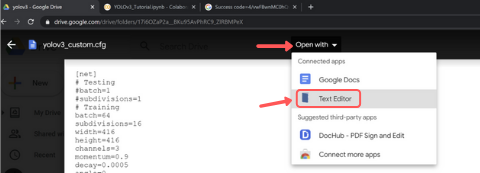

Setting **batch = 64** and **subdivisions = 16** for ultimate results. If run into any issues then up subdivisions to 32.

Make the rest of the changes to the cfg based on how many classes you are training your detector on.

**Note:** Set **max_batches = 10000** and **steps = 8000, 9000**. changed the **classes = 4** in the three YOLO layers and **filters = 27** in the three convolutional layers before the YOLO layers. 

**Optional:** In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if runing into any memory issues.


In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/YOLOv3/yolov3-flower.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3_tiny_flower/yolov3-tiny-flower.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

## ii) obj.names and obj.data 
Create a new file within a code or text editor called **obj.names** and you will make this file exactly the same as your classes.txt in the dataset generation step.

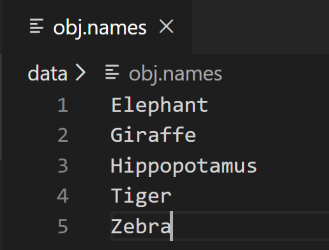

You will also create a **obj.data** file and fill it in like this (change your number of classes accordingly, as well as your backup location)

This backup path is where we will save the weights to of our model throughout training. Create a backup folder in your google drive and put its correct path in this file.

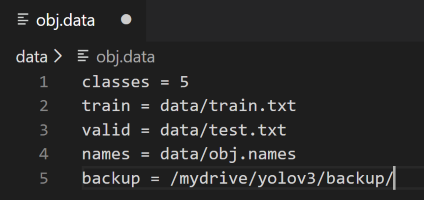



In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4_tiny_flower/obj.names ./data
!cp /mydrive/yolov4_tiny_flower/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

In [ ]:
!cp /mydrive/yolov3_tiny_flower/obj.data  ./data

## iii) Generating train.txt
The last configuration file needed before training our custom detector is the train.txt file which hold the relative paths to all our training images.


In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3_tiny_flower/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


Now run the python script.

In [ ]:
!python generate_train.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		scream.jpg  train.txt
coco9k.map  goal.txt		      obj.data		test	    voc.names
coco.names  horses.jpg		      obj.names		test_old
dog.jpg     imagenet.labels.list      openimages.names	test.txt
eagle.jpg   imagenet.shortnames.list  person.jpg	train


If everything went as planned double click on **train.txt** on the left side File Explorer and it should look like this.
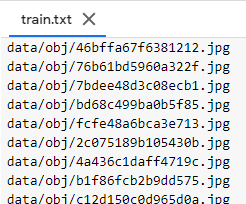

It will contain one line for each training image path.

# Step 4: Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps your custom object detector to be way more accurate and not have to train as long. You don't have to use these weights but trust me it will help your modle converge and be accurate way faster. USE IT!

In [ ]:
# upload pretrained convolutional layer weights
!wget https://github.com/hamzaMahdi/darknet/blob/master/yolov3-tiny.conv.15

Yolov3-tiny pretrained weight

In [ ]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

In [ ]:
!./darknet partial cfg/yolov3-tiny.cfg yolov3-tiny.weights yolov3-tiny.conv.15 15

YOLOv3 pretrained weight

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-02-12 14:26:49--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  48.8MB/s    in 3.2s    

2021-02-12 14:26:53 (48.8 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



YOLOv4 pretrained weights:

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

YOLOv4_tiny pretrained weights:

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

# Step 5: Train the Custom Object Detector
Train your custom YOLOv3/v4 object detector on the custom classes you have decided on. Run the following command. (dont_show flag stops a chart from popping up since cloud can't open images on the spot)
```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show -map
```
**TIP:** This training could take several hours depending on how many iterations you chose in the .cfg file. You will want to let this run as you sleep or go to work for the day, etc. However, Colab Cloud Service kicks you off it's VMs if you are idle for too long (30-90 mins).

To avoid this hold (CTRL + SHIFT + i) at the same time to open up the inspector view on your browser.

Paste the following code into your console window and hit **Enter**
```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```
Looks like this, it will click the screen every 10 minutes so that you don't get kicked off for being idle.

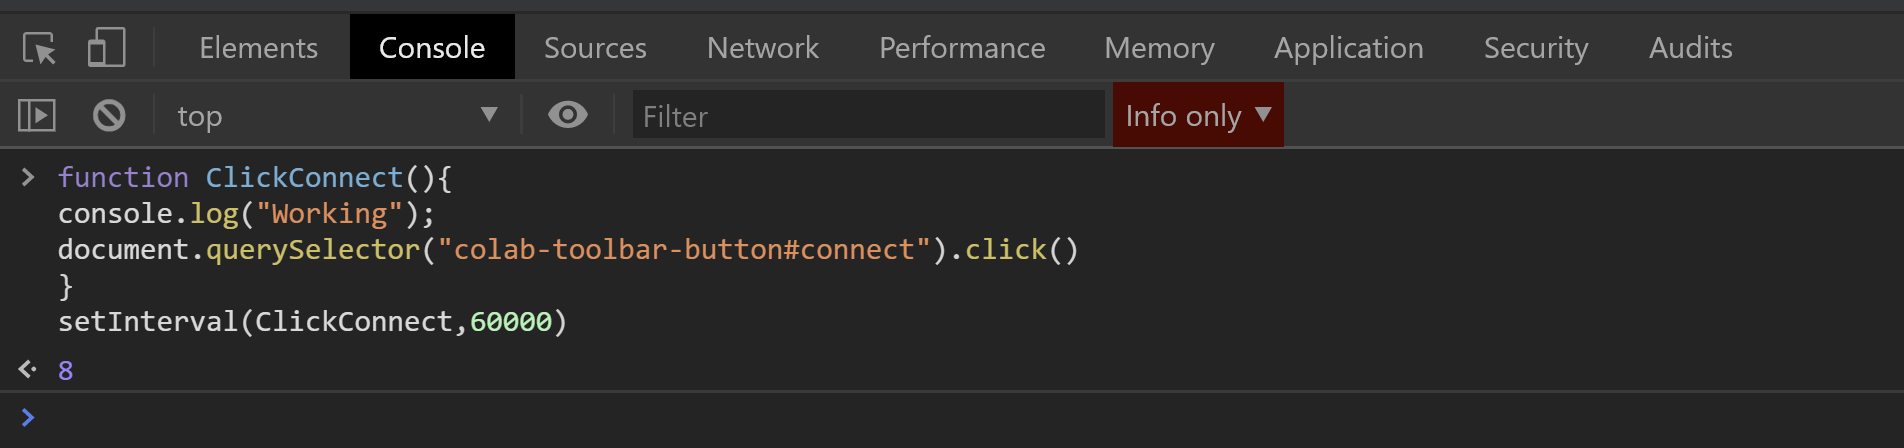

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3-tiny-flower.cfg yolov3-tiny.conv.15 -dont_show map

In [ ]:
#YOLOv3:
!./darknet detector train data/obj.data cfg/yolov3-flower.cfg darknet53.conv.74 -dont_show -map

Streaming output truncated to the last 5000 lines.
 total_bbox = 129426, rewritten_bbox = 0.010044 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.710286), count: 13, class_loss = 1.205212, iou_loss = 0.997211, total_loss = 2.202423 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000140, iou_loss = 0.000000, total_loss = 0.000140 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000011, iou_loss = 0.000000, total_loss = 0.000011 
 total_bbox = 129439, rewritten_bbox = 0.010043 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.709822), count: 9, class_loss = 1.262915, iou_loss = 0.819826, total_loss = 2.082741 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.610511), count: 7, class_loss = 1.699775, iou_loss = 0.958526, total_loss = 2.658302 
v3 (m

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

In [ ]:
imShow('chart.png')

**TRICK**: If for some reason you get an error or your Colab goes idle during training, you have not lost your weights! Every 100 iterations a weights file called **yolov3_custom_last.weights** is saved to **mydrive/yolov3/backup/** folder (wherever your backup folder is). This is why we created this folder in our Google drive and not on the cloud VM. If your runtime crashes and your backup folder was in your cloud VM you would lose your weights and your training progress.

We can kick off training from our last saved weights file so that we don't have to restart! WOOHOO! Just run the following command but with your backup location.
```
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show
```

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-flower.cfg /mydrive/YOLOv3/backup/yolov3-flower_last.weights -dont_show -map| tee /mydrive/YOLOv3/backup/train_yolov3_flower.log

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.871594), count: 9, class_loss = 0.013648, iou_loss = 0.101851, total_loss = 0.115499 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000337, iou_loss = 0.000000, total_loss = 0.000337 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 329928, rewritten_bbox = 0.009699 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.885674), count: 12, class_loss = 0.001198, iou_loss = 0.102454, total_loss = 0.103652 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000137, iou_loss = 0.000000, total_loss = 0.000137 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.

# Step 6: Checking the Mean Average Precision (mAP) of Your Model
If you didn't run the training with the '-map- flag added then you can still find out the mAP of your model after training. Run the following command on any of the saved weights from the training to see the mAP value for that specific weight's file. I would suggest to run it on multiple of the saved weights to compare and find the weights with the highest mAP as that is the most accurate one!

**NOTE:** If you think your final weights file has overfitted then it is important to run these mAP commands to see if one of the previously saved weights is a more accurate model for your classes.

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4_mask/backup/yolov4-obj_best.weights

# Step 7: Run the Custom Object Detector
You now have a custom object detector to make your very own detections. Time to test it out:

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-flower.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-flower.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	                           ->  152 x 152 x 128 
   9 max                2x 2/ 2   

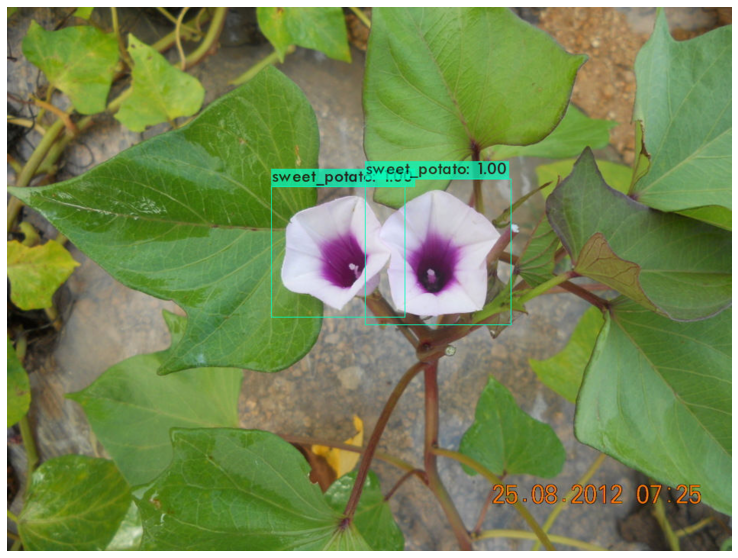

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-tiny-obj.cfg /mydrive/yolov4_tiny_flower/backup/yolov4-tiny-obj_best.weights /mydrive/image/image8.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 2

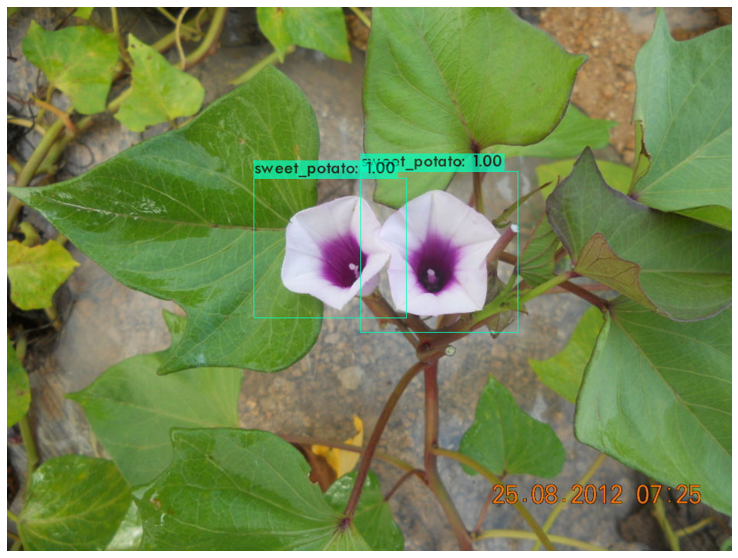

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3-tiny-flower.cfg /mydrive/yolov3_tiny_flower/backup/yolov3-tiny-flower_best.weights /mydrive/image/image8.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-tiny-obj.cfg /mydrive/yolov4_tiny_flower/backup/yolov4-tiny-obj_best.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	                           ->  152 x 152 x 128 
   9 max                2x 2/ 2   

In [ ]:
%cd /content/darknet


/content/darknet


# Step 8: Drawing PR curve
Drawing P-R curve based on testing dataset using PASCAL VOC 2007 standard 

In [ ]:
!./darknet detector valid data/obj.data cfg/yolov3-flower.cfg /mydrive/YOLOv3/backup/yolov3-flower_best_90.weights -out ""

 CUDA-version: 10010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
results: Using default 'results'
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt 

In [ ]:
!cp /mydrive/yolov3_tiny_flower/reval_voc_py3.py ./
!cp /mydrive/yolov3_tiny_flower/voc_eval_py3.py ./

rename the files in results dir as "comp4_det_test_<your class>"

In [ ]:
!python reval_voc_py3.py --voc_dir /content/gdrive/MyDrive/yolov3_tiny_flower/VOCdevkit --year 2007 --image_set test --classes data/obj.names testForFlower

Evaluating detections
VOC07 metric? Yes
devkit_path= /content/gdrive/MyDrive/yolov3_tiny_flower/VOCdevkit , year =  2007
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


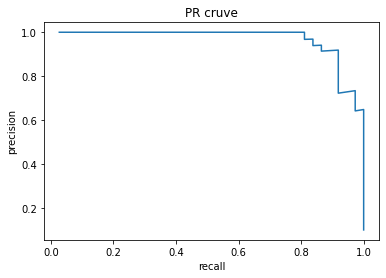

AP： 0.9607310659942241


In [ ]:
import _pickle as cPickle
import matplotlib.pyplot as plt
fr = open('/content/darknet/testForFlower/Ipomoea_triloba_pr.pkl','rb')#这里open中第一个参数需要修改成自己生产的pkl文件
inf = cPickle.load(fr)
fr.close()
 
x=inf['rec']
y=inf['prec']
plt.figure()
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR cruve')
plt.plot(x,y)
plt.show()
 
print('AP：',inf['ap'])

In [ ]:
!zip -r testForFlower.zip testForFlower

  adding: testForFlower/ (stored 0%)
  adding: testForFlower/Ipomoea_triloba_pr.pkl (deflated 58%)
  adding: testForFlower/sweet_potato_pr.pkl (deflated 59%)
  adding: testForFlower/potato_pr.pkl (deflated 53%)
  adding: testForFlower/eggplant_pr.pkl (deflated 56%)


In [ ]:
!zip -r results.zip results

  adding: results/ (stored 0%)
  adding: results/comp4_det_test_sweet_potato.txt (deflated 53%)
  adding: results/comp4_det_test_tmp.txt (stored 0%)
  adding: results/comp4_det_test_potato.txt (deflated 54%)
  adding: results/comp4_det_test_Ipomoea_triloba.txt (deflated 53%)
  adding: results/comp4_det_test_eggplant.txt (deflated 52%)
  adding: results/.ipynb_checkpoints/ (stored 0%)


# The End
Thanks for reading this tutorial.
This tutorial is receated based on the works of
[The AI Guy](https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q)